# Understanding Pulmonary Fibrosis Progression    

  Pulmonary fibrosis is a progressive disease that naturally gets worse over time. This worsening is related to the amount of fibrosis (scarring) in the lungs. As this occurs, a person's breathing becomes more difficult, eventually resulting in   shortness of breath, even at rest.

  Patients with pulmonary fibrosis experience disease progression at different rates. Some patients progress slowly and live with PF for many years, while others decline more quickly.

  There is no cure for pulmonary fibrosis, but treatments can slow the progression of the disease in some people. 
  


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('QdwuHKwOLRU', width=800, height=300)


## What is Forced Vital Capacity and how does Lung Function change with age, gender and smoking habbits.

Forced vital capacity (FVC) is the amount of air that can be forcibly exhaled from your lungs after taking the deepest breath possible, as measured by spirometry.

Forced expiratory volume is the most important measurement of lung function. It is used to:

    1) Diagnose obstructive lung diseases such as asthma and chronic obstructive pulmonary disease (COPD).
    
    2) See how well medicines used to improve breathing are working.
  
    3) Check if lung disease is getting worse. Decreases in the FEV1 value may mean the lung disease is getting worse.
    
### Lung function can be divided into three categories: spirometry to assess the dynamic flow rates: forced expiratory volume in one second (FEV1), forced vital capacity (FVC), and FEV-1/FVC ratio.


## Change in Lung Function with Age [Non Smokers]


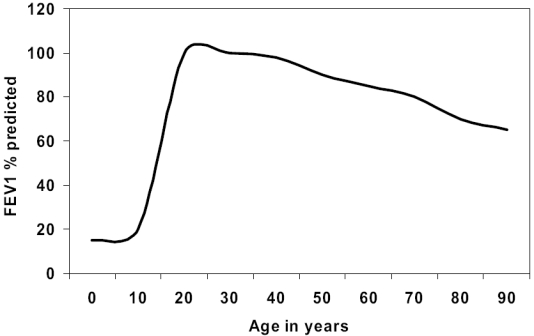

Age-related decline in forced expiratory volume in one second (FEV1)% predicted plotted as % of maximal at age 20 years against age.

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2695176

Effect of aging on respiratory system physiology and immunology
Gulshan Sharma1 and James Goodwin2

Clin Interv Aging. 2006 Sep; 1(3): 253–260. Published online 2006 Sep. doi: 10.2147/ciia.2006.1.3.253

## Change in Lung Function with Age [Smokers vs Non Smokers]


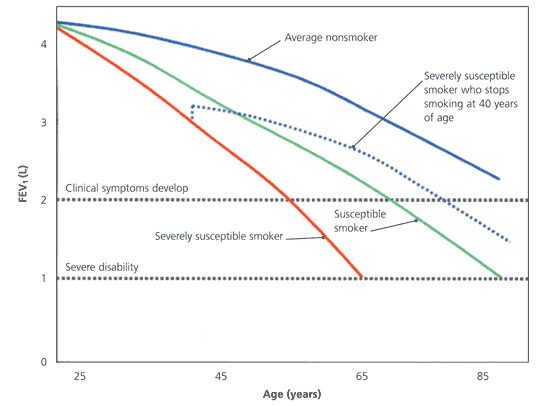

The natural history of lung function decline. Smokers who are susceptible to lung injury experience an increase in the rate of age-related loss in FEV1 compared with nonsmokers (red, green, and blue lines). After lung function declines to threshold levels, clinical symptoms develop (black dotted lines). When a smoker stops smoking, the rate of FEV1 loss again approximates to that of a nonsmoker (blue dotted line). (FEV1 = forced expiratory volume in one second.)

source: https://www.aafp.org/afp/2006/0215/p669.html


## Change in Lung Function with Age [Males Vs Females]

<img align="center" width="900"  src="https://github.com/tkrsh/osic-pulmonary-fibrosis-progression/blob/master/files/ssd.png?raw=true"> 
  
### The most conspicuous group differences at baseline for women were also mainly related to smoking, and the presence of respiratory symptoms: smokers had a greater risk of being in the ‘accelerating decline’



source: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0197250

    

In [ ]:
!pip install tensorflow_io

In [ ]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
import tensorflow_io as tfio 
import matplotlib.image as mpimg
import seaborn as sns 
import pydicom
sns.set_palette("bright")

# Demographic analysis
 

In [ ]:
df=pd.read_csv("../input/osic-pulmonary-fibrosis-progression/train.csv")

In [ ]:
(sns.countplot(df.Sex)).figure.savefig("output1.png")


In [ ]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(19,6)
sns.countplot(df['SmokingStatus'],ax=axs[0])
sns.countplot(df['SmokingStatus'][df['Sex']=="Male"],ax=axs[1])
sns.countplot(df['SmokingStatus'][df['Sex']=="Female"],ax=axs[2])
fig.savefig("output2.jpeg")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(df.Age,kde=False,bins=80,color="k")
fig.savefig("output3.jpeg")

In [ ]:
def create_last_scan_df():
    last_test=pd.DataFrame()    
    for i in df.Patient.unique():
        last_test=last_test.append((df[df['Patient']=="{}".format(i)][-1:]))
    last_test=last_test.drop("Patient",axis=1)
    last_test=last_test.drop("Weeks",axis=1)
    return last_test
dd=create_last_scan_df()
dd=dd.reset_index(drop=True)
dd.head()

In [ ]:
def create_baseline():
    first_scan=pd.DataFrame()    
    for i in df.Patient.unique():
        first_scan=first_scan.append((df[df['Patient']=="{}".format(i)][:1]))
    first_scan=first_scan.drop("Patient",axis=1)
    first_scan=first_scan.drop("Weeks",axis=1)
    return first_scan
fc=create_baseline()
fc=fc.reset_index(drop=True)
fc.head()

In [ ]:
(sns.pairplot(df,hue="SmokingStatus",height=4)).savefig("output4.jpeg")


## Baseline Data 

In [ ]:
sns.pairplot(fc,hue="SmokingStatus",height=4).savefig("output5.jpeg")

In [ ]:
(sns.pairplot(dd,hue="Sex",height=4)).savefig("output6.jpeg")

## Last Recorded Values

In [ ]:
(sns.pairplot(dd,hue="SmokingStatus",height=4)).savefig("output7.jpeg")


In [ ]:
(sns.pairplot(fc,hue="Sex",height=4)).savefig("output8.jpeg")


In [ ]:
ex_smoker_male=df.loc[df['Patient']=='{}'.format((df.loc[(df["Sex"]=="Male") & (df["SmokingStatus"]=="Ex-smoker"),'Patient'][:1].values[0]))]
ex_smoker_female=df.loc[df['Patient']=='{}'.format((df.loc[(df["Sex"]=="Female") & (df["SmokingStatus"]=="Ex-smoker"),'Patient'][:1].values[0]))]
non_smoker_male=df.loc[df['Patient']=='{}'.format((df.loc[(df["Sex"]=="Male") & (df["SmokingStatus"]=="Never smoked"),'Patient'][:1].values[0]))]
non_smoker_female=df.loc[df['Patient']=='{}'.format((df.loc[(df["Sex"]=="Female") & (df["SmokingStatus"]=="Never smoked"),'Patient'][:1].values[0]))]
current_smoker_male=df.loc[df['Patient']=='{}'.format((df.loc[(df["Sex"]=="Male") & (df["SmokingStatus"]=="Currently smokes"),'Patient'][:1].values[0]))]
current_smoker_female=df.loc[df['Patient']=='{}'.format((df.loc[(df["Sex"]=="Female") & (df["SmokingStatus"]=="Currently smokes"),'Patient'][:1].values[0]))]

# FVC and Percent Trend For All Patients

In [ ]:
fig, ax = plt.subplots(nrows=2)
fig.set_size_inches(22, 8.27)
sns.lineplot(x='Weeks',y='Percent',data=df,ax=ax[0])
sns.lineplot(x='Weeks',y='FVC',data=df,ax=ax[1])
fig.savefig("weeksvsfvc.jpeg")


# FVC And Percent Trend Male Vs Female

In [ ]:
males=df[df["Sex"]=="Male"]
females=df[df["Sex"]=="Female"]

In [ ]:
fig, ax = plt.subplots(nrows=4)
fig.set_size_inches(22, 22)
sns.lineplot(x='Weeks',y='FVC',data=males,ax=ax[0]).set_title("MALES FVC TREND")
sns.lineplot(x='Weeks',y='FVC',data=females,ax=ax[1]).set_title("FEMALE FVC TREND")
sns.lineplot(x='Weeks',y='Percent',data=males,ax=ax[2]).set_title("MALES PERCENT TREND")
sns.lineplot(x='Weeks',y='Percent',data=females,ax=ax[3]).set_title("FEMALE PERCENT TREND")
fig.savefig("mvffvctrend.jpeg")


# FVC And Percent Tread Of All Patients Smoker Vs Non-Smoker


In [ ]:
smoker=df[df["SmokingStatus"]=="Ex-smoker"]
never_smoked=df[df["SmokingStatus"]=="Never smoked"]
current_smoker=df[df["SmokingStatus"]=="Currently smokes"]

In [ ]:
fig, ax = plt.subplots(nrows=6)
fig.set_size_inches(22, 35)
sns.lineplot(x='Weeks',y='FVC',data=smoker,ax=ax[0]).set_title("EX SMOKER FVC TREND")
sns.lineplot(x='Weeks',y='FVC',data=never_smoked,ax=ax[1]).set_title("NON SMOKER FVC TREND")
sns.lineplot(x='Weeks',y='FVC',data=current_smoker,ax=ax[2]).set_title("SMOKER FVC TREND")
sns.lineplot(x='Weeks',y='Percent',data=smoker,ax=ax[3]).set_title("EX SMOKER PERCENT  TREND")
sns.lineplot(x='Weeks',y='Percent',data=never_smoked,ax=ax[4]).set_title("NON SMOKER PERCENT TREND")
sns.lineplot(x='Weeks',y='Percent',data=current_smoker,ax=ax[5]).set_title("SMOKER PERCENT TREND")
fig.savefig("weeksvpercent.jpeg")


# FVC And Percent Trend Of Random Patients Of All Categories

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(22,5)
sns.lineplot(x=ex_smoker_male["Weeks"], y=ex_smoker_male["FVC"],label='ex_smoker_male')
sns.lineplot(x=ex_smoker_female["Weeks"], y=ex_smoker_female["FVC"],label='ex_smoker_female')
sns.lineplot(x=non_smoker_male["Weeks"], y=non_smoker_male["FVC"],label='non_smoker_male')
sns.lineplot(x=non_smoker_female["Weeks"], y=non_smoker_female["FVC"],label='non_smoker_female')
sns.lineplot(x=current_smoker_male["Weeks"], y=current_smoker_male["FVC"],label='current_smoker_male')
sns.lineplot(x=current_smoker_female["Weeks"], y=current_smoker_female["FVC"],label='current_smoker_female')
fig.savefig("smoker_current_fvc.jpeg")


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(22,5)
sns.lineplot(x=ex_smoker_male["Weeks"], y=ex_smoker_male["Percent"],label='ex_smoker_male')
sns.lineplot(x=ex_smoker_female["Weeks"], y=ex_smoker_female["Percent"],label='ex_smoker_female')
sns.lineplot(x=non_smoker_male["Weeks"], y=non_smoker_male["Percent"],label='non_smoker_male')
sns.lineplot(x=non_smoker_female["Weeks"], y=non_smoker_female["Percent"],label='non_smoker_female')
sns.lineplot(x=current_smoker_male["Weeks"], y=current_smoker_male["Percent"],label='current_smoker_male')
sns.lineplot(x=current_smoker_female["Weeks"], y=current_smoker_female["Percent"],label='current_smoker_female')
fig.savefig("sdad.jpeg")


# Visualising Dicom Files 

In [ ]:
files=[]
for dirname, _, filenames in os.walk('../input/osic-pulmonary-fibrosis-progression/train'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

### Using tensorflow_io to decode Dicom files

In [ ]:
def decode_image(image_path):
    image_bytes = tf.io.read_file(image_path)
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)
    image=np.squeeze(image.numpy())
    return image 

In [ ]:
def show_scan(image):
    img = decode_image(image)
    patient_name=str(image).split('/')[1]
    fig, ax = plt.subplots()
    im=ax.imshow(img,cmap='twilight_r')
    plt.axis('off')
    plt.title("Baseline CT Scan of Patient {}".format(patient_name))
    fig.set_size_inches(9,9)
    plt.show()

In [ ]:
show_scan(files[3])

In [ ]:
def choose_patient(ID):
    images_x=[]
    for i in files:
        name=str(i)
        if str(ID) in name:
            images_x.append(i)
    return sorted(images_x)

def generate_images(images):
    for x,i in enumerate(images):
        image=decode_image(i)   
        fname=str(x)+".png"
        plt.imsave(fname,image,cmap='twilight_shifted')    
        
def make_progressive_video():
    os.system("ffmpeg  -r 30 -i %d.png -vcodec mpeg4 -y -vb 400M patient_ct_scan_progression.mp4")

In [ ]:
patient_x=choose_patient(df['Patient'][288])
generate_images(patient_x)
make_progressive_video()

In [ ]:
!rm -r *.png

In [ ]:
!ffmpeg -i patient_ct_scan_progression.mp4 out.gif

![Gif](./out.gif)